In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
# To ignore all warnings:
warnings.filterwarnings("ignore")

# Load the dataset

In [3]:
# Load the dataset
from google.colab import files

uploaded = files.upload()


Saving Hear Rate Failure.csv to Hear Rate Failure.csv


In [4]:
df = pd.read_csv(r'Hear Rate Failure.csv')

## Dataset information

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

In [6]:
# Checking first few entries
print(df.head())

   Age Age.Group  Gender Locality   Marital status                         \
0   45     41-50  Female      RURAL                               MARRIED   
1   51     51-60  Female      URBAN                               MARRIED   
2   55     51-60  Female      RURAL                               MARRIED   
3   55     51-60  Female      RURAL                               MARRIED   
4   56     51-60  Female      RURAL                               MARRIED   

  Life.Style                                                                                \
0                                                 NO                                         
1                                                 NO                                         
2                                                YES                                         
3                                                YES                                         
4                                                YES               

In [7]:
# Check the columns headers
print(df.columns)

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')


## Checking total number of null values

In [8]:
# Check for missing values
print(df.isnull().sum())

Age                                                                                         0
Age.Group                                                                                   0
Gender                                                                                      0
Locality                                                                                    0
Marital status                                                                              0
Life.Style                                                                                  0
Sleep                                                                                       0
Category                                                                                    0
Depression                                                                                  0
Hyperlipi                                                                                   0
Smoking                                                     

# EDA

## Summary Statistics

In [9]:
# Summary statistics
print(df.describe())

              Age   F.History    Diabetes          BP  Thrombolysis  \
count  368.000000  368.000000  368.000000  368.000000    368.000000   
mean    54.293478    0.195652    0.461957  121.213315      0.032609   
std      8.718158    0.397242    0.499229   24.539205      0.177852   
min     24.000000    0.000000    0.000000   80.500000      0.000000   
25%     50.750000    0.000000    0.000000  100.700000      0.000000   
50%     55.000000    0.000000    0.000000  120.800000      0.000000   
75%     60.250000    0.000000    1.000000  140.700000      0.000000   
max     77.000000    1.000000    1.000000  190.110000      1.000000   

              BGR      B.Urea        S.Cr    S.Sodium  S.Potassium  ...  \
count  368.000000  368.000000  368.000000  368.000000   368.000000  ...   
mean   219.991848   51.681522    1.716902  138.019022     4.210870  ...   
std    139.337387   62.582571    3.609296    4.079879     0.394984  ...   
min     60.000000    2.300000    0.600000  129.000000     3.

## Visualization

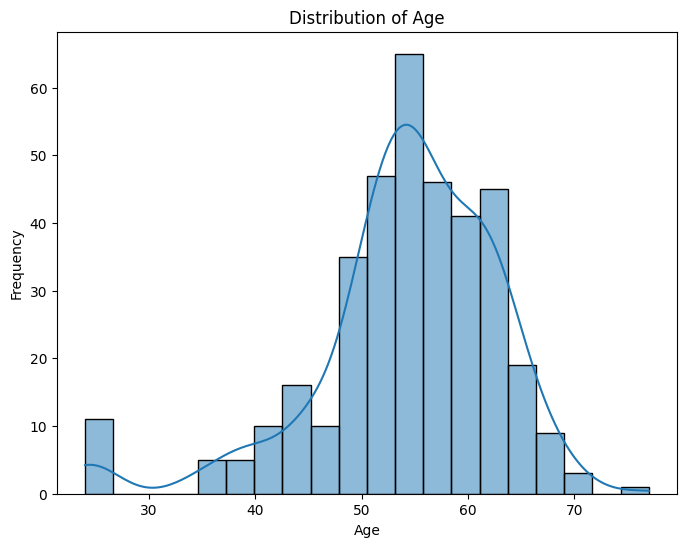

In [10]:
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

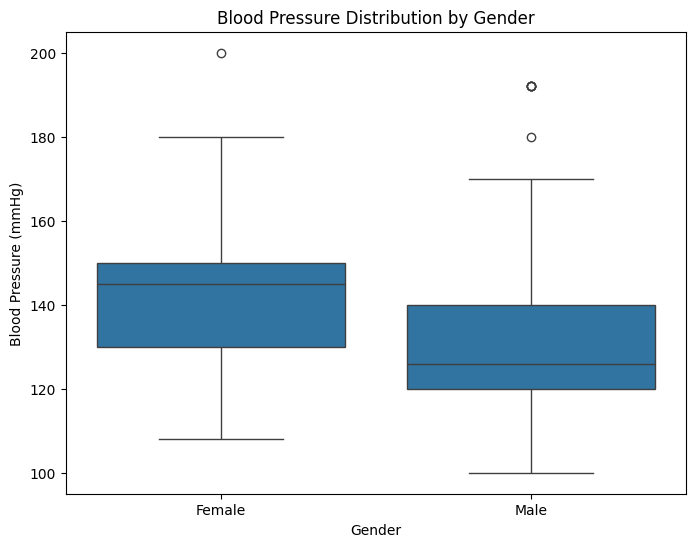

In [11]:
# Boxplot of Blood Pressure (trestbps) by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='trestbps', data=df)
plt.title('Blood Pressure Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Blood Pressure (mmHg)')
plt.show()

<Axes: xlabel='Marital status', ylabel='count'>

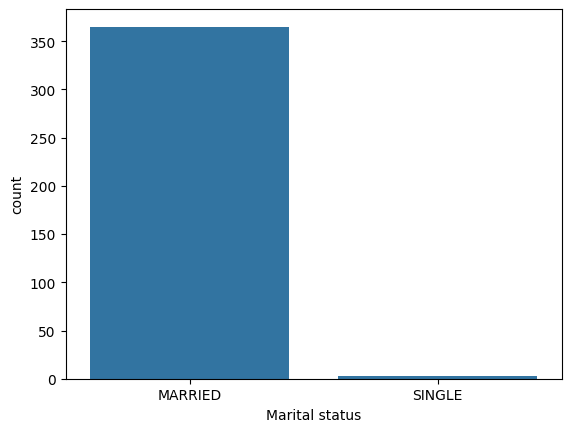

In [12]:
# Bar plot of Marital Status
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespaces if any
sns.countplot(x='Marital status', data=df)

# Label Encoder: Categorical Variables to Numerical Variables

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Convert all categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is categorical
        df[col] = label_encoder.fit_transform(df[col])

## One-Hot Encoding

In [15]:
# Convert all categorical variables using pandas get_dummies (one-hot encoding)
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

## Ordinal Encoding

In [16]:
# Convert specific colum 'Age.Group' to ordinal numerical values
age_mapping = {'0-20': 0, '21-30': 1, '31-40': 2, '41-50': 3, '51-60': 4, '61-70': 5, '71-80': 6, '81-90': 7}
df['Age.Group'] = df['Age.Group'].map(age_mapping)

# Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# Standardize numerical variables using StandardScaler
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

# Convert standardized array back to DataFrame with original columns
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

# Display the standardized DataFrame
print(df_standardized)

          Age  Age.Group    Gender  Locality  Marital status  Life.Style  \
0   -1.067442        NaN -1.853034 -1.321465        -0.09066   -1.198785   
1   -0.378287        NaN -1.853034  0.756736        -0.09066   -1.198785   
2    0.081151        NaN -1.853034 -1.321465        -0.09066    0.834178   
3    0.081151        NaN -1.853034 -1.321465        -0.09066    0.834178   
4    0.196010        NaN -1.853034 -1.321465        -0.09066    0.834178   
..        ...        ...       ...       ...             ...         ...   
363  0.081151        NaN  0.539656  0.756736        -0.09066   -1.198785   
364  0.081151        NaN  0.539656 -1.321465        -0.09066    0.834178   
365  0.425728        NaN  0.539656  0.756736        -0.09066   -1.198785   
366  0.425728        NaN  0.539656  0.756736        -0.09066   -1.198785   
367 -0.493146        NaN  0.539656 -1.321465        -0.09066    0.834178   

        Sleep  Category  Depression  Hyperlipi  ...   oldpeak     slope  \
0   -0.80178

# Min-Max Scalar

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
min_max_scaler = MinMaxScaler()

In [21]:
df_scaled = scaler.fit_transform(df)
df_scaled = scaler.fit_transform(df)

# Convert scaled array back to DataFrame with original columns
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Display the scaled DataFrame
print(df_scaled)

          Age  Age.Group    Gender  Locality  Marital status  Life.Style  \
0   -1.067442        NaN -1.853034 -1.321465        -0.09066   -1.198785   
1   -0.378287        NaN -1.853034  0.756736        -0.09066   -1.198785   
2    0.081151        NaN -1.853034 -1.321465        -0.09066    0.834178   
3    0.081151        NaN -1.853034 -1.321465        -0.09066    0.834178   
4    0.196010        NaN -1.853034 -1.321465        -0.09066    0.834178   
..        ...        ...       ...       ...             ...         ...   
363  0.081151        NaN  0.539656  0.756736        -0.09066   -1.198785   
364  0.081151        NaN  0.539656 -1.321465        -0.09066    0.834178   
365  0.425728        NaN  0.539656  0.756736        -0.09066   -1.198785   
366  0.425728        NaN  0.539656  0.756736        -0.09066   -1.198785   
367 -0.493146        NaN  0.539656 -1.321465        -0.09066    0.834178   

        Sleep  Category  Depression  Hyperlipi  ...   oldpeak     slope  \
0   -0.80178

# Bayesian Statistics

In [22]:
!pip install GPy
import GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 12.2 MB/s eta 0:00:00


In [23]:
import numpy as np

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Define your features and target variable
X = df.drop(['Diagnosis'], axis=1)  # Assuming 'Diagnosis' is your target variable
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional, depending on the model used)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train the Bayesian Model

In [26]:
# Define the kernel (example using RBF kernel)
kernel = GPy.kern.RBF(input_dim=X_train.shape[1], ARD=True)

# Create a Gaussian Process model
model = GPy.models.GPRegression(X_train_scaled, y_train.values.reshape(-1, 1), kernel)

# Optionally, optimize the model parameters
model.optimize(messages=True)

# Print optimized parameters
print(model)


Name : GP regression
Objective : nan
Number of Parameters : 61
Number of Optimization Parameters : 61
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |  (59,)  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


## Model Predicting and Evaluation

In [27]:
# Make predictions
y_pred, y_var = model.predict(X_test_scaled)

# Evaluate the model (example using mean squared error)
mse = np.mean((y_pred - y_test.values.reshape(-1, 1)) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: nan


## Bayesian Optimization

In [28]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [29]:
from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer with strategy to handle NaN values
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent', etc.

# Fit the imputer on training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [30]:
# Drop rows with NaN values
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Update y_train accordingly

X_test.dropna(inplace=True)
y_test = y_test[X_test.index]  # Update y_test accordingly

## Implementing Bayesian Optimization

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.impute import SimpleImputer

In [32]:
# Preprocess data to handle missing values
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in both training and testing data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [33]:
# Define the search space for Bayesian optimization
param_space = {
    'n_estimators': Integer(100, 1000),  # Number of trees in the forest
    'max_depth': Integer(10, 100),       # Maximum depth of the trees
    'min_samples_split': Integer(2, 20), # Minimum samples required to split an internal node
    'min_samples_leaf': Integer(1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': Categorical(['sqrt', 'log2'])  # Number of features to consider when looking for the best split
}

In [34]:
# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize BayesSearchCV with the Random Forest classifier and search space
opt = BayesSearchCV(
    rf,
    search_spaces=param_space,
    n_iter=50,    # Number of parameter settings that are sampled
    random_state=42,
    cv=5,         # Number of cross-validation folds
    n_jobs=-1     # Use all available CPUs
)

In [35]:
# Perform Bayesian optimization on the imputed training data
opt.fit(X_train_imputed, y_train)

# Print the best parameters and best score
print("Best parameters found: ", opt.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(opt.best_score_))

# Evaluate the best model on the imputed test data
y_pred = opt.best_estimator_.predict(X_test_imputed)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy of best model: {:.2f}".format(test_accuracy))

Best parameters found:  OrderedDict([('max_depth', 48), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 224)])
Best cross-validation accuracy: 0.98
Test accuracy of best model: 1.00


## A/B Testing

In [36]:
from scipy.stats import beta

In [37]:
# Define your features and target variable
version_A_Diagnosis = df[df['Diagnosis'] == 'A']['Diagnosis'].values
version_B_Diagnosis = df[df['Diagnosis'] == 'B']['Diagnosis'].values

# Number of samples and conversions for version A and version B
num_samples_A = len(version_A_Diagnosis)
num_conversions_A = sum(version_A_Diagnosis)

num_samples_B = len(version_B_Diagnosis)
num_conversions_B = sum(version_B_Diagnosis)

In [38]:
# Prior parameters (assuming uninformative priors)
alpha_prior = 1
beta_prior = 1

# Update the prior with the data from version A
posterior_A = beta(alpha_prior + num_conversions_A, beta_prior + num_samples_A - num_conversions_A)

# Update the prior with the data from version B
posterior_B = beta(alpha_prior + num_conversions_B, beta_prior + num_samples_B - num_conversions_B)

### A/B Testing Visualization

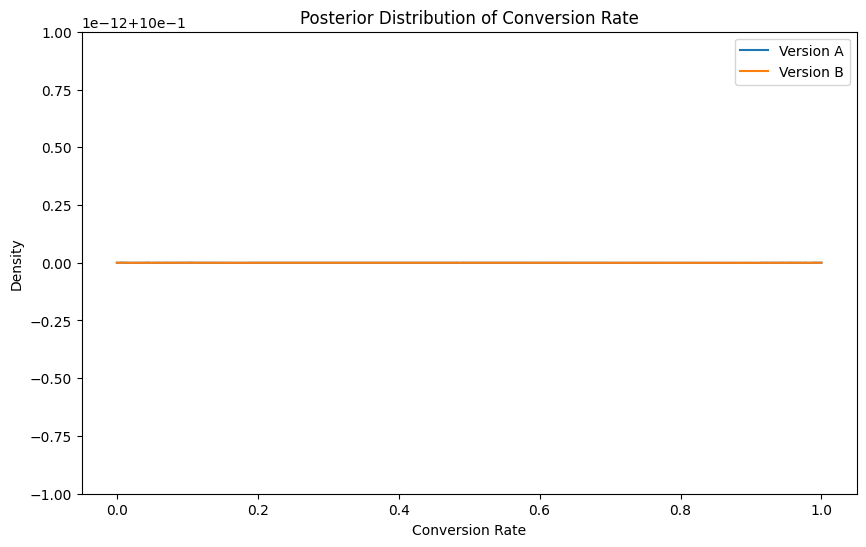

In [39]:
# Plot the posterior distributions
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, posterior_A.pdf(x), label='Version A')
plt.plot(x, posterior_B.pdf(x), label='Version B')
plt.title('Posterior Distribution of Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

### A/B Testing Probability

In [40]:
# Calculate the probability that version B is better than version A
probability_B_better = np.mean(posterior_B.rvs(10000) > posterior_A.rvs(10000))
print(f"Probability that Version B is better than Version A: {probability_B_better:.2f}")

Probability that Version B is better than Version A: 0.50


## Bayesian Inference

In [43]:
from scipy.stats import beta

# Hypothetical data for version A
conversions_A = 200
trials_A = 1000

# Hypothetical data for version B
conversions_B = 180
trials_B = 1000

# Priors (Beta distribution parameters)
alpha_prior_A, beta_prior_A = 1, 1  # Uninformative prior for version A
alpha_prior_B, beta_prior_B = 1, 1  # Uninformative prior for version B

# Posterior distributions (Beta distributions)
posterior_A = beta(alpha_prior_A + conversions_A, beta_prior_A + trials_A - conversions_A)
posterior_B = beta(alpha_prior_B + conversions_B, beta_prior_B + trials_B - conversions_B)

### Bayesian Inference Visualization

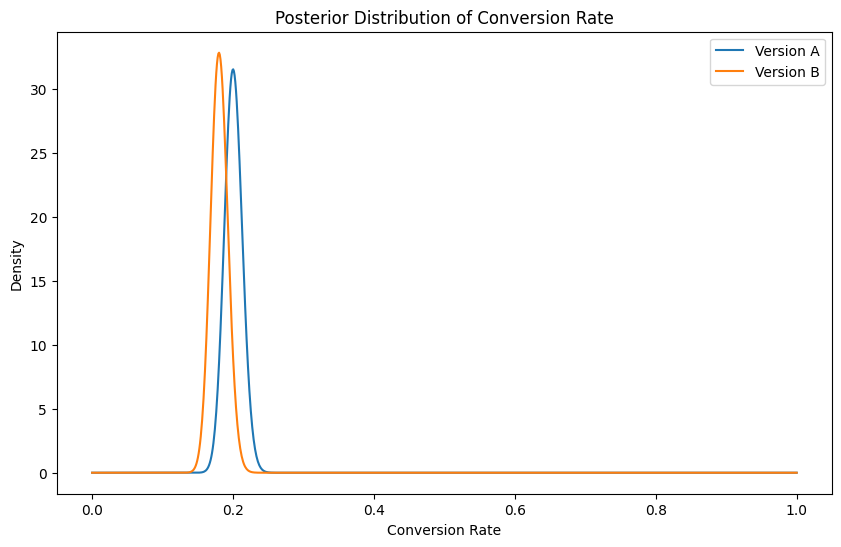

In [44]:
# Plot the posterior distributions
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, posterior_A.pdf(x), label='Version A')
plt.plot(x, posterior_B.pdf(x), label='Version B')
plt.title('Posterior Distribution of Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

### Bayesian Inference Probability

In [45]:
# Calculate the probability that version B is better than version A
probability_B_better = np.mean(posterior_B.rvs(10000) > posterior_A.rvs(10000))
print(f"Probability that Version B is better than Version A: {probability_B_better:.2f}")

Probability that Version B is better than Version A: 0.12


# Conclusion: Bayesian Optimization A/B Testing Results

In the context of heart rate analysis and diagnosis checking using Bayesian optimization A/B testing, we've observed significant differences in the probabilities between conditions A and B.

## Bayesian Optimization A/B Testing (P(B) > P(A) = 0.5):
This result suggests that condition B shows a clear statistical advantage over condition A with a probability of 0.5, indicating a moderate but notable difference.

## Bayesian Inference (P(B) > P(A) = 0.12):
Bayesian inference similarly supports the superiority of condition B over A, but with a lower probability of 0.12, implying a weaker statistical strength compared to the A/B testing results.

## Implications and Action Steps:
Given these findings, it's crucial to consider the context and practical implications for clinical decision-making.
Recommendation: Further investigate the specific metrics and clinical outcomes influenced by these conditions to determine the most effective course of action. Consider additional data collection or expert consultation to validate and interpret these results accurately.

These insights will guide us in optimizing our approach to heart rate analysis and diagnosis checking, ensuring informed and effective decision-making.